<a href="https://colab.research.google.com/github/nrubio6131/nico_CIS/blob/master/trabajos_CIS/trabajo2_regresion_polinomica_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures #libreria nueva 

In [2]:
# import gspread
# from oauth2client.client import GoogleCredentials 
# from google.colab import auth
# auth.authenticate_user()
# gc = gspread.authorize (GoogleCredentials.get_application_default())

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#importamos los datos
#data1 = pd.read_csv('/content/drive/My Drive/CIS/DATASET/Salary_Data.csv',delimiter=',')#desde google drive
data1 = pd.read_csv('../data/datos_polinomio.csv',delimiter=',')#desde una carpeta en el repositorio
data1

,X,Y1,x2,Y2,X3,Y3,Y1_ruido,Y2_ruido,Y3_ruido
0,-1.00,5.000,-4.00,-14.0000,-1.00,8.000000,3.600,-12.5700,7.420000
1,-0.98,4.604,-3.96,-13.8584,-0.97,7.299665,4.144,-12.8784,8.699665
2,-0.96,4.216,-3.92,-13.7136,-0.94,6.638120,5.046,-14.4836,5.268120
3,-0.94,3.836,-3.88,-13.5656,-0.91,6.014555,4.346,-12.9856,4.384555
4,-0.92,3.464,-3.84,-13.4144,-0.88,5.428160,1.994,-14.4544,6.458160
...,...,...,...,...,...,...,...,...,...
95,0.90,3.100,-0.20,13.7400,1.85,2.549375,1.340,11.8200,2.479375
96,0.92,3.464,-0.16,14.1856,1.88,1.917440,4.544,15.7556,2.657440
97,0.94,3.836,-0.12,14.6344,1.91,1.247345,4.176,13.9944,3.107345
98,0.96,4.216,-0.08,15.0864,1.94,0.538280,2.616,14.4064,-0.661720


In [265]:
#Organizamos los datos
X1 = data1.iloc[:,4]
X1= X1[:, np.newaxis]
Y1= data1.iloc[:,8]
Y1 = Y1[:, np.newaxis]
print("dimension en X {}" .format(X1.shape))
print("dimension en Y {}" .format(Y1.shape))

dimension en X (100, 1)
dimension en Y (100, 1)


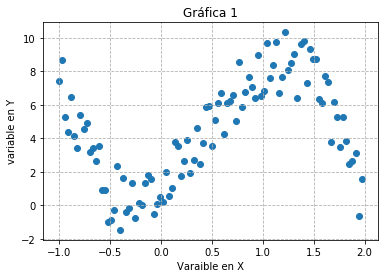

In [266]:
#graficamos y analizamos los datos
##formas de graficar
# plt.scatter(X_train, Y_train, color="red", marker='^', alpha=0.5)
# plt.scatter(X1,Y1, marker='o',alpha=1)
# plt.scatter(X1,Y1)

plt.scatter(X1,Y1)
plt.title("Gráfica 1")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.grid(linestyle='--')
plt.show()

In [7]:

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=.3, random_state=3)

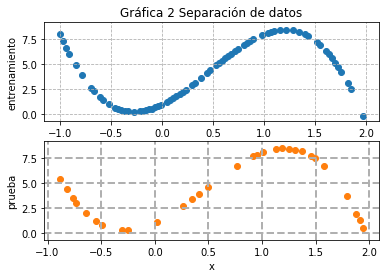

In [267]:
f, [ax1, ax2] = plt.subplots(2, 1, sharey=True) 
ax1.set_title("Gráfica 2 Separación de datos")
ax1.set_ylabel('entrenamiento')
ax2.set_ylabel('prueba')
ax2.set_xlabel('x')
ax1.scatter(X_train,Y_train)
ax2.scatter(X_test, Y_test, color=  '#ff7f0e')
ax1.grid(linestyle='--')
ax2.grid(linestyle='--',linewidth=2)
plt.show()

# Prueba con regresión lineal

In [268]:
regresion = LinearRegression()
regresion.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

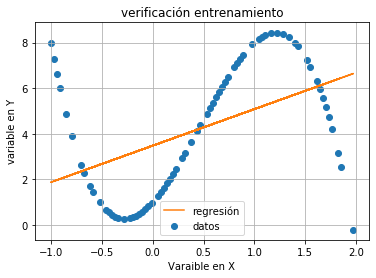

In [269]:
plt.scatter(X_train, Y_train,label='datos')
plt.plot(X_train, regresion.predict(X_train), color=  '#ff7f0e',label='regresión')
plt.title("verificación entrenamiento")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.legend()
plt.grid()
plt.show()

# Regresión pólinomial

In [135]:
#realizamos la regresion ahora polinomial
pf = PolynomialFeatures(degree = 25)    # usaremos polinomios de grado 3
X_poli = pf.fit_transform(X_train.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_polinomial= LinearRegression()
regresion_polinomial.fit(X_poli, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

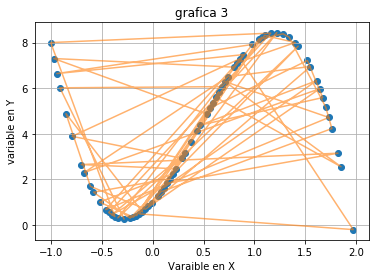

In [136]:
plt.scatter(X_train, Y_train)
#plt.scatter(X_train, regresion_lineal.predict(X_poli), marker='.')#probar con plot
plt.plot(X_train, regresion_polinomial.predict(X_poli), color=  '#ff7f0e',alpha=0.6)#probar con plot
plt.title("grafica 3")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.grid()
plt.show()
#lso datos están desorganizados

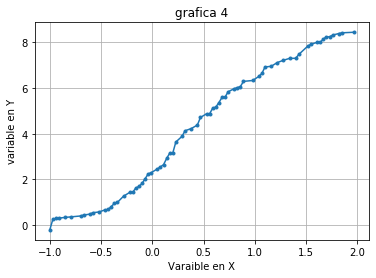

In [137]:
#Organizacion de datos con Numpy    SORT
X_train_organizado=np.sort(X_train[:,0])
Y_predecido_organizado=np.sort(regresion_polinomial.predict(X_poli)[:,0])

plt.plot(X_train_organizado, Y_predecido_organizado, marker='.')#probar con plot
plt.title("grafica 4")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.grid()
plt.show()

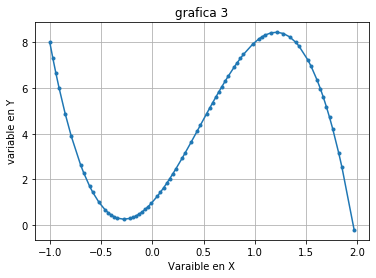

In [138]:
#Organizacion de datos con pandas    SORT
datos_organizados_2=pd.DataFrame([X_train[:,0],regresion_polinomial.predict(X_poli)[:,0]]).transpose()
datos_organizados_2.columns=['x_organizado_2','y_organizado_2']
datos_organizados_2=datos_organizados_2.sort_values('x_organizado_2')
X1_organizado = datos_organizados_2.iloc[:,0]
X1_organizado= X1_organizado[:, np.newaxis]
Y1_organizado = datos_organizados_2.iloc[:,1]
Y1_organizado= Y1_organizado[:, np.newaxis]

plt.plot(X1_organizado, Y1_organizado, marker='.')
plt.title("grafica 3")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.grid()
plt.show()

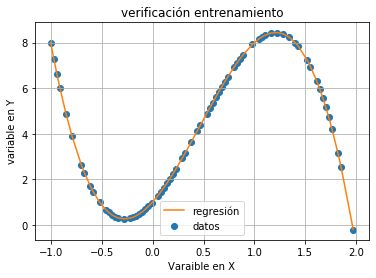

In [139]:
#Graficamos los datos ya organizados
plt.scatter(X_train, Y_train,label='datos')
plt.plot(X1_organizado, Y1_organizado, color=  '#ff7f0e',label='regresión')#probar con plot
plt.title("verificación entrenamiento")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.legend()
plt.grid()
plt.show()

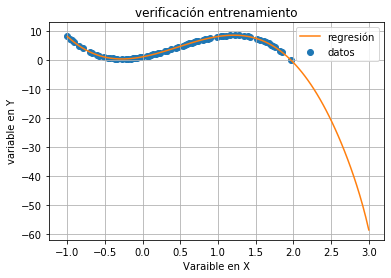

In [148]:
X_2=np.linspace(-1,3,100)
X_poli = pf.fit_transform(X_2.reshape(-1,1))  # transformamos la entrada en polinómica
#regresion_polinomial.predict(X_poli)
plt.plot(X_2, regresion_polinomial.predict(X_poli), color='#ff7f0e',label='regresión')#probar con plot
plt.scatter(X_train, Y_train,label='datos')
plt.title("verificación entrenamiento")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.legend()
plt.grid()
plt.show()

# X_2=np.array([1])
# X_poli = pf.fit_transform(X_2.reshape(-1,1))  # transformamos la entrada en polinómica
# regresion_polinomial.predict(X_poli)

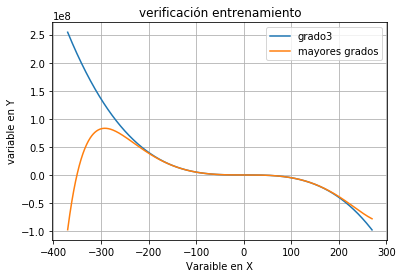

In [264]:
# X_prueba=np.linspace(-150,150,1000)#para grado 10
X_prueba=np.linspace(-370,270,1000)#para grado 9
X_prueba=np.linspace(-370,270,1000)#para grado 9

pf1 = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X_1 = pf1.fit_transform(X_train.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_polinomial1= LinearRegression()
regresion_polinomial1.fit(X_1, Y_train)
X_poli1 = pf1.fit_transform(X_prueba.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_polinomial1.predict(X_poli1)

pf2 = PolynomialFeatures(degree = 9)    # usaremos polinomios de grado 3
X_2 = pf2.fit_transform(X_train.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_polinomial2= LinearRegression()
regresion_polinomial2.fit(X_2, Y_train)
X_poli2 = pf2.fit_transform(X_prueba.reshape(-1,1))  # transformamos la entrada en polinómica
regresion_polinomial2.predict(X_poli2)

plt.plot(X_prueba, regresion_polinomial1.predict(X_poli1),label='grado3')#probar con plot
plt.plot(X_prueba, regresion_polinomial2.predict(X_poli2),label='mayores grados')#probar con plot

plt.title("verificación entrenamiento")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.legend()
plt.grid()
plt.show()